# Importing orders.csv to DataFrame

In [1]:
import numpy as np
import pandas as pd

In [2]:
url = "https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=share_link" # orders.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders = pd.read_csv(path)

# Performing basic operations on DataFrame

In [3]:
orders.head(20)

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
7,245851,2017-04-04 20:58:21,79.99,Pending
8,245941,2017-01-01 10:32:23,183.52,Completed
9,246018,2017-02-13 23:02:57,211.95,Completed


In [4]:
orders.tail(20)

,order_id,created_date,total_paid,state
226889,527382,2018-03-14 13:47:43,0.00,Shopping Basket
226890,527383,2018-03-14 13:48:51,9.99,Shopping Basket
226891,527384,2018-03-14 13:49:11,249.99,Place Order
226892,527385,2018-03-14 13:49:21,13.99,Shopping Basket
226893,527386,2018-03-14 13:49:48,161.00,Place Order
226894,527387,2018-03-14 13:50:06,9.99,Shopping Basket
226895,527388,2018-03-14 13:51:59,34.98,Shopping Basket
226896,527389,2018-03-14 13:52:15,9.99,Shopping Basket
226897,527390,2018-03-14 13:52:33,9.99,Shopping Basket
226898,527391,2018-03-14 13:57:54,54.98,Pending


Every row in this file represents an order.
- order_id – a unique identifier for each order
- created_date – a timestamp for when the order was created
- total_paid – the total amount paid by the customer for this order, in euros
- state 
 - “Shopping basket” – products have been placed in the shopping basket, but the order has not been processed yet.
 - “Pending” – the shopping basket has been processed, but payment confirmation is pending.
 - “Completed” – the order has been placed and paid, and the transaction is completed.
 - “Cancelled” – the order has been cancelled and the payment returned to the customer.

In [5]:
orders.columns

Index(['order_id', 'created_date', 'total_paid', 'state'], dtype='object')

## Dimensions

In [6]:
orders.shape

(226909, 4)

In [7]:
orders.size

907636

## Description

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [9]:
orders.describe()

,order_id,total_paid
count,226909.000000,226904.000000
mean,413296.482480,569.225818
std,65919.250331,1761.778002
min,241319.000000,0.000000
25%,356263.000000,34.190000
50%,413040.000000,112.990000
75%,470553.000000,525.980000
max,527401.000000,214747.530000


In [10]:
orders.order_id.count()

226909

In [11]:
orders.total_paid.count()

226904

In [12]:
orders.state.value_counts().sort_values(ascending = False)

Shopping Basket    117809
Completed           46605
Place Order         40883
Pending             14379
Cancelled            7233
Name: state, dtype: int64

How is the dataset indexed?

In [15]:
orders.index

RangeIndex(start=0, stop=226909, step=1)

Are there any duplicates?

In [16]:
orders.duplicated().sum()

0

## Missing values

In [17]:
# examining missing values
print("Missing values distribution: ")
print(orders.isnull().mean())
print("")

Missing values distribution: 
order_id        0.000000
created_date    0.000000
total_paid      0.000022
state           0.000000
dtype: float64



In [18]:
orders.total_paid.isna().sum()

5

## Simple Visualization

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

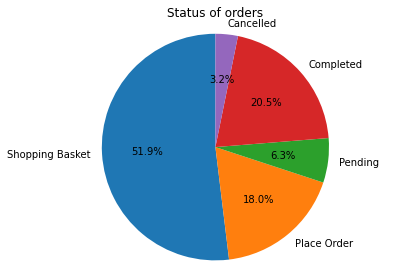

In [14]:
a = (orders['state'] == 'Shopping Basket').sum()
b = (orders['state'] == 'Place Order').sum()
c = (orders['state'] == 'Pending').sum()
d = (orders['state'] == 'Completed').sum()
e = (orders['state'] == 'Cancelled').sum()

# put them into a list called proportions
proportions = [a, b, c, d, e]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['Shopping Basket', 'Place Order', 'Pending', 'Completed', 'Cancelled'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    #colors = ['blue','red'],
    
    # with one slide exploded out
    #explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Status of orders")

# View the plot
plt.tight_layout()
plt.show()